# Rozdzielczość obrazu. Interpolacja.

## Cel zajęć:

* zapoznanie z pojęciem rozdzielczości przestrzennej (rozmiaru obrazu),
* metody interpolacji najbliższego sąsiada oraz dwuliniowa,
* zapoznanie z pojęciem rozdzielczości dpi (ang. dots per inch),
* zapoznanie z pojęciem rozdzielczości  poziomów jasności (dla obrazów w skali szarości),
* zadanie domowe: interpolacja dwusześcienna.

## Rodzielczość przestrzenna

Dyskretna reprezentacja obrazu to zwykle macierz dwu (N x M - obraz w skali szarości) lub trójwymiarowa (N x M x 3 - obraz kolorowy).
Przez rozdzielczość przestrzenną rozumie się liczbę pikseli z których składa się obraz.
Przykładowo rozdzielczość VGA to  640 x 480, Full HD to 1920 x 1080, a 4K to 3840 x 2160.
Rozdzielczość obrazu można modyfikować (zwiększać/zmniejszać), co nazywa się skalowaniem obrazu.
Warto wiedzieć, że zwiększenie rozdzielczości obrazu nie zwiększa ilości informacji, a jedynie liczbę pikseli (w sensie "lepiej nie będzie").
Ponadto skalowanie zawsze wprowadza pewne zniekształcenia, nawet przy zmniejszaniu rozmiaru.

W ramach niniejszego ćwiczenia zapoznamy się z metodami interpolacji, które są podstawą takich operacji jak: przybliżanie (zoom), zmiana rozdzielczości, rotacja obrazu, czy też korekcje geometryczne.
Jako przykład posłuży nam zmiana rozdzielczości, czyli inaczej mówiąc przepróbkowanie obrazu.
Dla przypomnienia - interpolacja to wykorzystanie znanych danych (wartości dla tzw. punktów węzłowych) do określania wartości w nieznanych lokalizacjach.

Zacznijmy od prostego przykładu.
Mamy obraz o rozdzielczości 500 x 500 pikseli, a chcemy go powiększyć do 750 x 750 pikseli -- tj. o~współczynnik 1,5.
Wyobraźmy sobie zatem, że dysponujemy siatką 750 x 750 o takim samym "rozmiarze" pojedynczego piksela jak obraz oryginalny.
Następnie siatkę tą ,,ścieśniamy'', tak aby miała rozmiar 500 x 500.
W rezultacie otrzymana siatka będzie miała mniejszy rozmiar pojedynczego piksela niż obraz oryginalny.
Schematycznie przedstawiono to na poniższym rysunku.

![Ilustracja interpolacji](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/interEx57.png)


Pokazuje on przykład interpolacji: a) obraz 5x5, b) oraz 7x7, c) obraz 7x7 zmiejszony do 5x5.


Chcemy teraz poszczególnym elementom nowej siatki przyporządkować piksele z obrazu wejściowego.
Jedną z możliwości jest poszukanie "najbliższego" piksela w oryginalnym obrazie i wzięcie jego wartości.
Przykład takiego postępowania zaprezentowano na  poniższym rysunku.

![Ilustracja najbliższego sąsiada](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/inteNNEx.png)

Kilka słów wyjasnienia.
Kolorem ciemnoszarym oznaczono siatkę 5x5, a czarnym 7x7 (już po przeskalowaniu).
Nasze zadanie sprowadza się do znalezienia dla każdej kropki czarnej (umowny środek piksela), najbliżej leżącej kropki szarej - oznaczono to dla pierwszych trzech wierzszy obrazu liniami.

Po zrealizowaniu powyższego kroku dla całego obrazu wykonujemy "rozciągniecie" do rozdzielczości 750 x 750.
W ten sposób uzyskujemy finalny efekt zmiany rozdzielczości.

## Interpolacja metodą najbliższego sąsiada

Takie postępowanie określa się mianem **interpolacji metodą najbliższego sąsiada** (ang. *nearest neighbour interpolation*).
W ramach pierwszego etapu ćwiczenia zaimplementujemy to podejście.

1. Ładujemy potrzebne biblioteki, pobieramy obrazy z repozytorium, wczytujemy jeden z obrazów testowych (*parrot.bmp*) i wyświetlamy go:

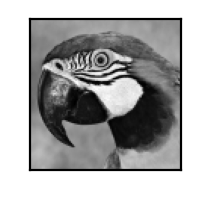

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

# Load required files
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate
if not os.path.exists("clock.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/clock.bmp --no-check-certificate
if not os.path.exists("chessboard.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/chessboard.bmp --no-check-certificate
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/lena.bmp --no-check-certificate
if not os.path.exists("firetruck.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/firetruck.jpg --no-check-certificate


I = cv2.imread('parrot.bmp')           # Read image
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) # Convert to RGB

# Display
plt.figure(figsize=(I.shape[0]/100,I.shape[1]/100), dpi=200)
plt.imshow(I, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

2. Definiujemy funkcję do interpolacji metodą najbliższego sąsiada.

Jako argumenty wejściowe powinna ona przyjąć obraz oraz współczynniki skalowania w pionie i poziomie.
Wyjściem powinien być natomiast obraz w nowej rozdzielczości.
Wewnątrz należy:

* odczytać wymiary obrazka wejściowego,
* wyliczyć wymiary obrazka wyjściowego (tj. wymnożyć wymiary wejściowe przez skalę i zaokrąglić do liczb całkowitych),
* utworzyć nowy obraz o ww. rozmiarze,
* w pętli po nowym obrazie, dla każdego piksela, wykorzystując współczynniki skalowania, odnaleźć najbliższego sąsiada.




In [2]:
# TODO: Do samodzielnej implemetantacji
def closestNeighbourInterpolation(I, Xscale, Yscale):
    y, x = I.shape
    newY, newX = int(y * Yscale), int(x * Xscale)
    M = np.zeros((newY, newX))

    for i in range(newY):
        for j in range(newX):
            M[i][j] = I[int(i//Yscale)][int(j//Xscale)]
    return M


def closestNeighbourInterpolationPlot(I, Xscale, Yscale):
    resizedImg = closestNeighbourInterpolation(I, Xscale, Yscale)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(I, 'gray')
    ax1.set_title("Original Image")

    ax2.imshow(resizedImg, 'gray')
    ax2.set_title(f"Resized Img; Xscale: {Xscale}; Yscale: {Yscale}")
    plt.show()


3. Testujemy stworzoną funkcję:
    * dla skali 1.5, 1.5 i obrazka *parrot*,
    * dla 2.5, 2.5 - tu okaże się, że do kodu trzeba dopisać zabezpieczenie przed wyjściem poza zakres,
    * dla niejednakowych skal np. 1.5 i 2.5,
    * dla skal mniejszych od 1,
    * dla niesymetrycznego obrazka *clock*,
    * dla obrazka z szachownicą *chessboard*.

Uwaga: proszę dla powyższych przypadków przygotować osobne sekcje kodu - tak, aby wyświetlały się wszystkie rozważane przypadki.

Wykonana metoda jest bardzo prosta i szybka, ale wprowadza pewne niepożądane artefakty, w szczególnie źle odwzorowane są linie proste.
Z drugiej strony sprawdza się w pewnych nietypowych przypadkach.
Zostanie to zademonstrowane w dalszej części ćwiczenia.

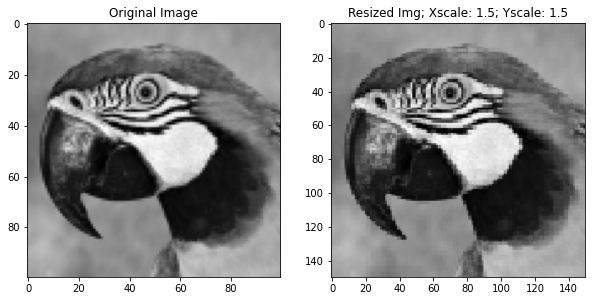

In [3]:
# TODO: Do samodzielnej implemetantacji
closestNeighbourInterpolationPlot(I, 1.5, 1.5)

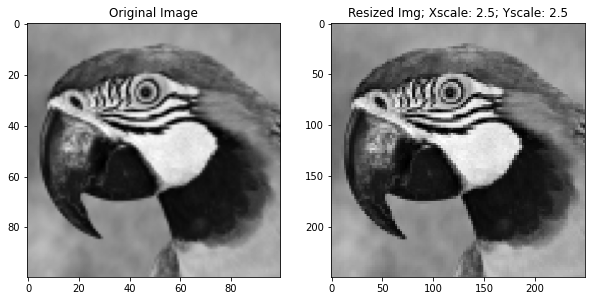

In [4]:
closestNeighbourInterpolationPlot(I, 2.5, 2.5)

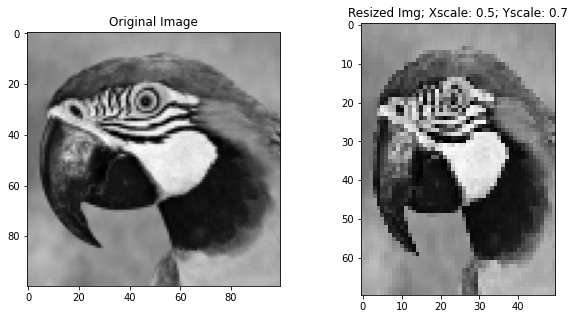

In [5]:
closestNeighbourInterpolationPlot(I, 0.5, 0.7)

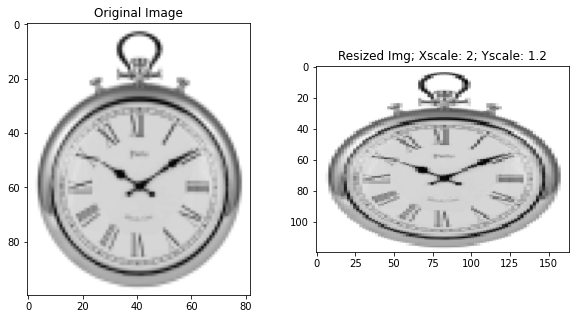

In [6]:
clock = cv2.imread("clock.bmp", cv2.IMREAD_GRAYSCALE)
closestNeighbourInterpolationPlot(clock, 2, 1.2)

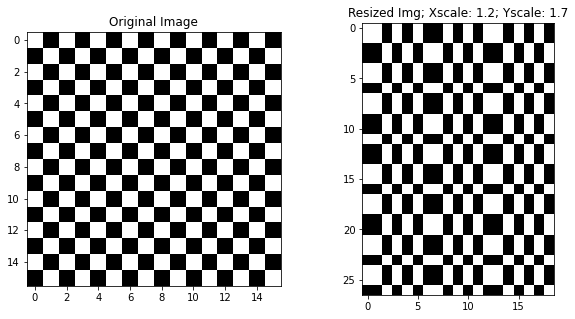

In [7]:
chessboard = cv2.imread("chessboard.bmp", cv2.IMREAD_GRAYSCALE)
closestNeighbourInterpolationPlot(chessboard, 1.2, 1.7)

## Interpolacja dwuliniowa

W praktyce, lepszym rozwiązaniem zwykle okazuje tzw. **interpolacja dwuliniowa** (ang. *bilinear interpolation*).
Wykorzystuje ona informację o czterech najbliższych sąsiadach do określenia nowej wartości piksela.

Jeśli przez $(i,j)$ oznaczymy współrzędne poszukiwanego piksela, a przez $I(i,j)$ jego jasność (składową w~odcieniach szarości) to jego wartość można obliczyć wykorzystując równanie:
\begin{equation}
I(i,j) = a \cdot i + b \cdot j+ c \cdot i \cdot j + d
\tag{1}
\end{equation}
gdzie: współczynniki $a,b,c,d$ można wyliczyć na podstawie czterech najbliższych sąsiadów.

![Ilustracja dwuliniowej](https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/img/interABCD.png)

Prześledźmy to na przykładzie z powyższego rysunku.
Niech współrzędne poszczególnych punktów to $A = (j_1,i_1)$, $B = (j_1,i_2)$, $C= (j_2,i_2)$ oraz $D = (j_2,i_1)$.
W pierwszej kolejności dokonujemy interpolacji wartości w punktach $AB$ i $CD$ -- czyli poziomo.
Wychodząc od równania prostej otrzymujemy:

\begin{equation}
f(AB) \approx \frac{i_2 - i}{i_2-i_1}f(A) + \frac{i - i_1}{i_2-i_1}f(B)
\tag{2}
\end{equation}

\begin{equation}
f(CD) \approx \frac{i_2 - i}{i_2-i_1}f(D) + \frac{i - i_1}{i_2-i_1}f(C)
\tag{3}
\end{equation}

Następnie wykonujemy analogiczną interpolację w pionie:
\begin{equation}
f(ABCD) \approx \frac{j_2 - j}{j_2-j_1}f(AB) + \frac{j - j_1}{j_2-j_1}f(CD)
\tag{4}
\end{equation}

Łącząc powyższe równania otrzymujemy:
\begin{equation}
f(ABCD) \approx \frac{1}{(i_2 - i_1)(j_2-j_1)} ( f(A)(i_2-i)(j_2 - y) + f(B)(i-i_1)(j_2 - j) \\ + f(C)(i-i_1)(j-j_1) + f(D)(i_2-i)(j-j_1))
\tag{5}
\end{equation}
gdzie zapis $f(X)$ oznacza wartość piksela w punkcie $X$.

Rozważania można uprościć przyjmując, że narożniki rozpatrywanego kwadratu mają następujące współrzędne: $A = (0,0)$, $B = (0,1)$, $C= (1,1)$ oraz $D = (1,0)$.
Wtedy powyższe równanie można zapisać:
\begin{equation}
f(ABCD) \approx f(A)(1-i)(1-j) + f(B)i(1-j) + f(C)ij + f(D)(1-i)j
\tag{6}
\end{equation}

lub macierzowo:
\begin{equation}
f(ABCD) \approx \begin{bmatrix}1 - i & i \end{bmatrix} \begin{bmatrix} f(A) & f(D) \\\\ f(B) & f(C)  \end{bmatrix}   \begin{bmatrix} 1-j \\\\ j  \end{bmatrix}
\tag{7}
\end{equation}

Uwaga.
Nieco wbrew nazwie interpolacja dwuliniowa nie jest operacją liniową.
W złożeniu dwóch operacji liniowych pojawia się człon $xy$.

Warto dodać, że kolejny ``poziom wtajemniczenia'' to **interpolacja dwusześcienna** (ang. *bicubic interpolation*).
Dana jest ona wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\tag{8}
\end{equation}
Jej implementacja stanowi zadanie domowe do bieżącego ćwiczenia.

Trzy powyżej przedstawione metody bynajmniej nie wyczerpują tematu.
Wystarczy choćby otworzyć stronę [wiki o skalowaniu](https://en.wikipedia.org/wiki/Image_scaling), by zobaczyć, że metod jest dużo więcej.



Wykorzystując powyższe równania zaimplementuj interpolację dwuliniową:
* dobrym punktem wyjścia będzie stworzona funkcja do interpolacji metodą najbliższego sąsiada,
* początek powinien być identyczny,
* różnice rozpoczynają się w momencie obliczenia współrzędnych nowego piksela,
* jeśli chcemy zastosować opisane powyżej wzory (w wariancie uproszczonym), to musimy wyliczyć współrzędne punktów $A,B,C,D$,
* w pierwszym kroku obliczamy współrzędne $A$ tj. $(0,0)$ - należy do tego wykorzystać funkcję *floor* (np. $i_1 = floor(i / h_{scale})$).
  Proszę ten krok odnieść do przedstawionego rysunku poglądowego,
* obliczenie współrzędnych $B,C,D$ jest już proste i sprowadza się do operacji `+1`,
* potrzebujemy jeszcze część ułamkową współrzędnych punktu $ABCD$ tj. $(i,j)$ - od ilorazu $i/h_{scale}$ należy odjąć wartość $i_1$
* wykorzystując wyznaczone współrzędne, należy pobrać wartości jasności w punktach $A,B,C,D$, tj. $f(A),f(B),f(C),f(D)$, podstawić do odpowiedniego równania i wykonać interpolację.

  Uwagi:
* Tworzenie macierzy *np.array*, mnożenie macierzy *np.dot*. Przy tworzeniu macierzy proszę zwrócić uwagę na niezbędne nawiasy kwadratowe.
* Przy próbie uruchomienia kodu pewnie okaże się, że wystąpi przekroczenie zakresu - należy dodać stosowne zabezpieczenie.

Proszę dla interpolacji dwuliniowej wykonać takie same eksperymenty, jak dla  najbliższego sąsiada.




In [8]:
# TODO: Do samodzielnej implemetantacji
def BilinearInterpolation(I, Xscale, Yscale):
    x, y = I.shape
    newY, newX = int(y * Yscale), int(x * Xscale)
    M = np.zeros((newX, newY))

    for i in range(newX):
        for j in range(newY):
            i_w = i/Xscale
            j_w = j/Yscale

            i1 = int(np.floor(i_w))
            j1 = int(np.floor(j_w))
            i2 = int(np.floor(i_w + 1))
            j2 = int(np.floor(j_w + 1))

            #zabezpieczenia
            if i2>=x:
                i2=i2-1
            if j2>=y:
                j2=j2-1
                
            # Na wypadek wartości w rogach
            if i1==i2: i1=i1-1
            if j1==j2: j1=j1-1

            f_A = I[i1][j1]
            f_B = I[i1][j2]
            f_C = I[i2][j2]
            f_D = I[i2][j1]

            fAB = ((j2 - j_w)/(j2 - j1)) * f_A + ((j_w - j1)/(j2 - j1)) * f_B
            fCD = ((j2 - j_w)/(j2 - j1)) * f_C + ((j_w - j1)/(j2 - j1)) * f_D
            fABCD=((i2 - i_w)/(i2 - i1)) * fAB + ((i_w - i1)/(i2 - i1)) * fCD
            M[i][j] = int(np.round(fABCD))
    return M


def BilinearInterpolationPlot(I, Xscale, Yscale):
    resizedImg = BilinearInterpolation(I, Xscale, Yscale)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(I, 'gray')
    ax1.set_title("Original Image")

    ax2.imshow(resizedImg, 'gray')
    ax2.set_title(f"Resized Img; Xscale: {Xscale}; Yscale: {Yscale}")
    plt.show()



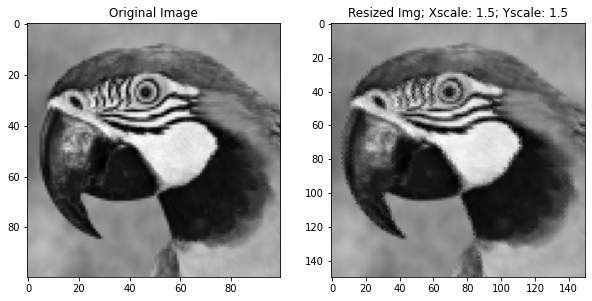

In [9]:
#TODO Do samodzielnej implementacji
BilinearInterpolationPlot(I, 1.5, 1.5)

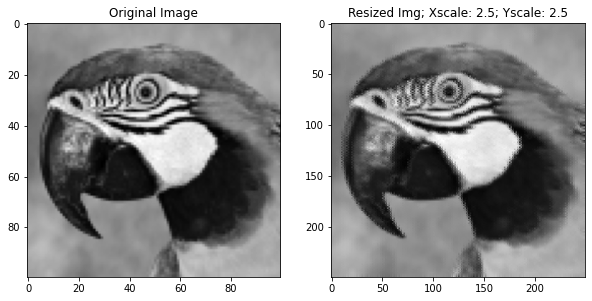

In [10]:
BilinearInterpolationPlot(I, 2.5, 2.5)

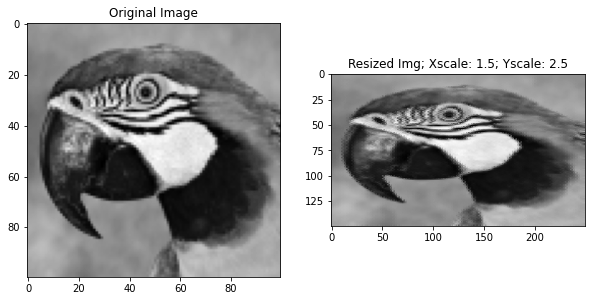

In [11]:
BilinearInterpolationPlot(I, 1.5, 2.5)

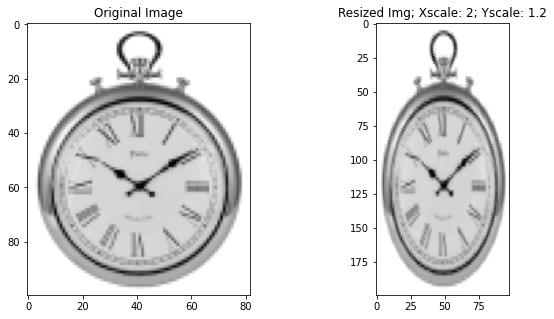

In [12]:
BilinearInterpolationPlot(clock, 2, 1.2)

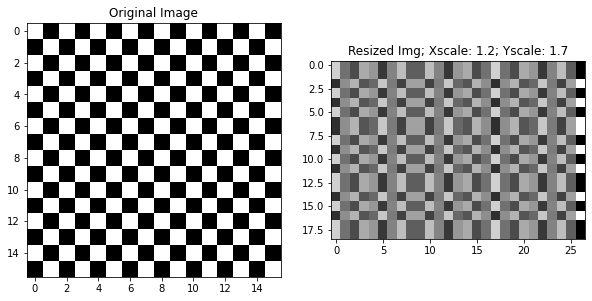

In [13]:
BilinearInterpolationPlot(chessboard, 1.2, 1.7)

## Interpolacja w OpenCV

W OpenCV dostępna jest funkcja `resize`, która służy do zmiany rozmiaru obrazka.
Składnia jest następująca `dst = cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]] )`, gdzie `det` to obraz wynikowy, `src` obraz źródłowy, `dsize` rozmiar docelowy (ew. można podać współczynniki skalowania dla poszczególnych osi: `fx,fy`), `interpolation` metoda interpolacji.
Metod podstawowych dostępnych jest 5:
- najbliższego sąsiada - ` cv2.INTER_NEAREST`,
- dwuliniowa - ` cv2.INTER_LINEAR`,
- dwukubiczna - ` cv2.INTER_CUBIC`,
- *area* - ` cv2.INTER_AREA`,
- *lanczos4* - ` cv2.INTER_LANCZOS4`.

Przeprowadzimy następujący eksperyment: obraz (o większej niż dotąd rozdzielczości) przeskalujemy każdą z metod -- zwiększymy i zmniejszymy jego rozdzielczość. Dodamy też pomiar czasu realizacji obliczeń.

Obraz: TODO


Proszę stworzyć funkcję, która jako argumenty przyjmuje obraz oraz dwa współczynniki skalujące, a wewnątrz przeprowadzone zostaną interpolacje, pomiar czasu oraz wizualizacja (można wypisać czas w tytule rysunku).

Pomiar czasu:
```{python}
from timeit import default_timer as timer
start = timer()
# ...
end = timer()
print(end - start)
```

Wykonaj eksperyment dla kilku różnych skal, przeanalizuj czasy obliczeń.

In [32]:
from timeit import default_timer as timer
#TODO Do samodzielnej implementacji

def resize_img(I, Xscale, Yscale, interpolation):
    Y, X = I.shape
    start = timer()
    resizedImg = cv2.resize(I, (int(Xscale * X), int(Yscale * Y)), interpolation=interpolation)
    end = timer()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Xscale: {Xscale}; Yscale: {Yscale}; Time: {(end - start):e} seconds;", fontsize=16)

    ax1.imshow(I, 'gray')
    ax1.set_title("Original Image")

    ax2.imshow(resizedImg, 'gray')
    ax2.set_title(f"Resized Image")

    plt.show()


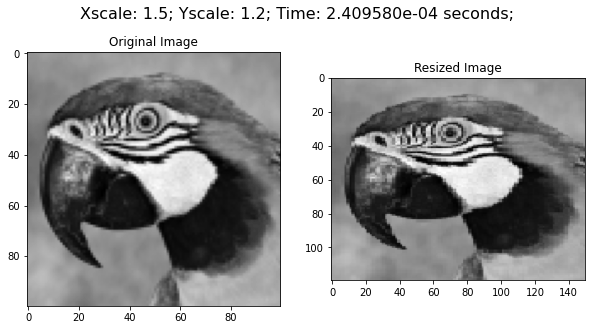

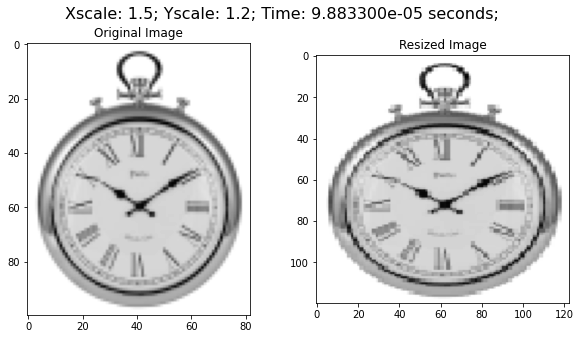

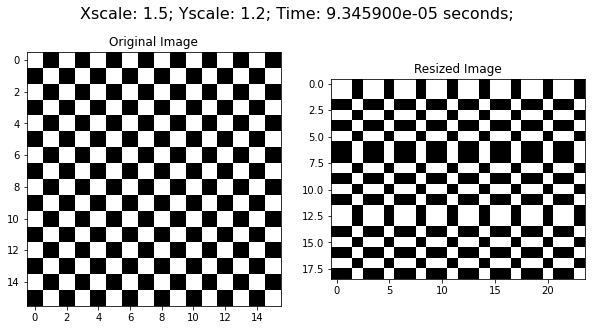

In [40]:
resize_img(I, 1.5, 1.2, cv2.INTER_NEAREST)
resize_img(clock, 1.5, 1.2, cv2.INTER_NEAREST)
resize_img(chessboard, 1.5, 1.2, cv2.INTER_NEAREST)

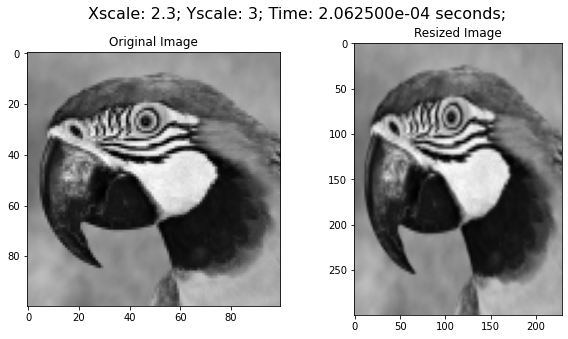

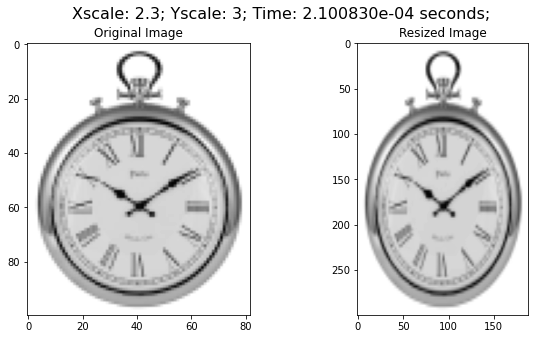

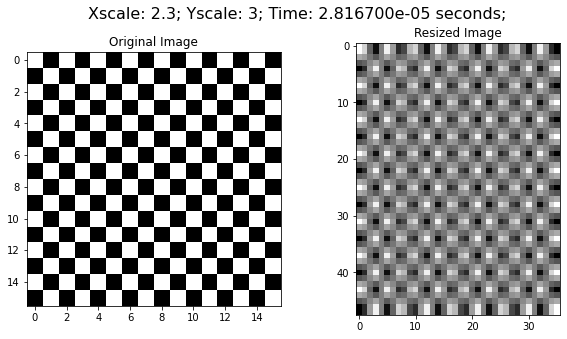

In [41]:
resize_img(I, 2.3, 3, cv2.INTER_LINEAR)
resize_img(clock, 2.3, 3, cv2.INTER_LINEAR)
resize_img(chessboard, 2.3, 3, cv2.INTER_LINEAR)

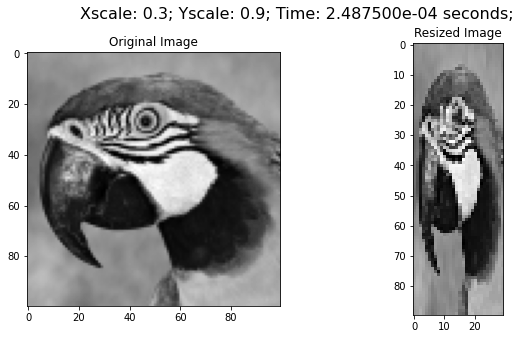

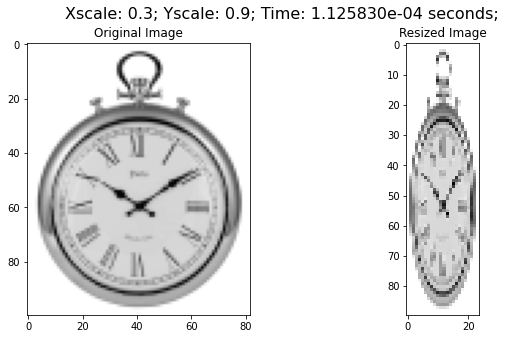

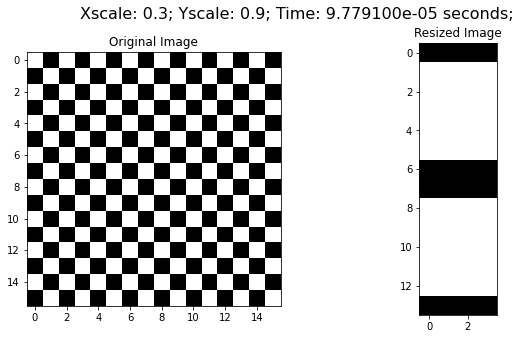

In [42]:
resize_img(I, 0.3, 0.9, cv2.INTER_CUBIC)
resize_img(clock, 0.3, 0.9, cv2.INTER_CUBIC)
resize_img(chessboard, 0.3, 0.9, cv2.INTER_CUBIC)

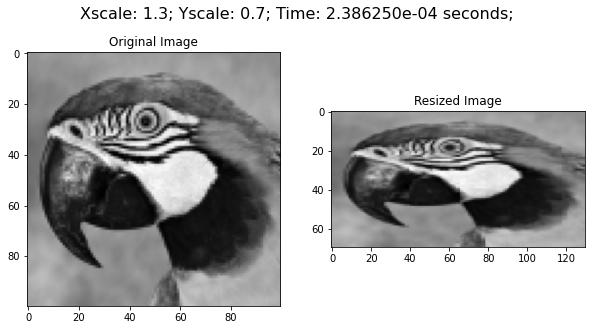

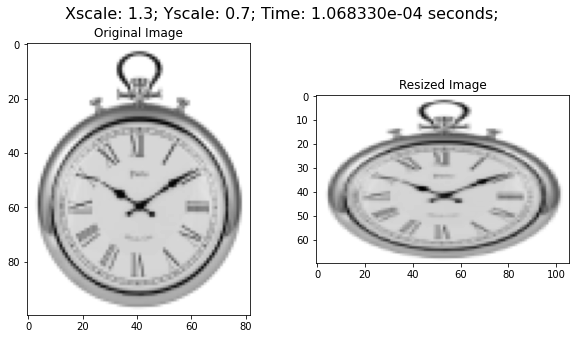

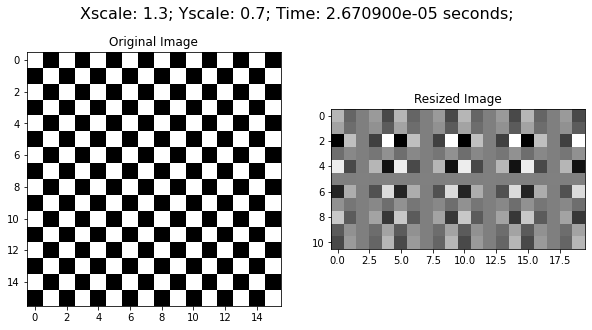

In [43]:
resize_img(I, 1.3, 0.7, cv2.INTER_AREA)
resize_img(clock, 1.3, 0.7, cv2.INTER_AREA)
resize_img(chessboard, 1.3, 0.7, cv2.INTER_AREA)

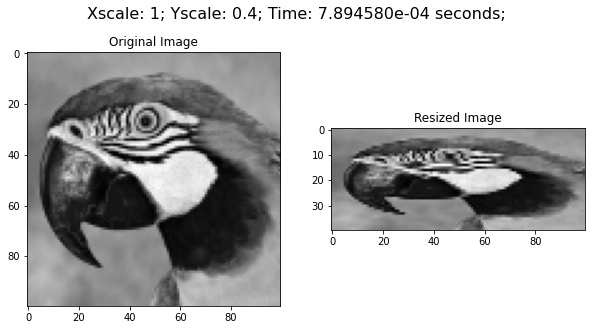

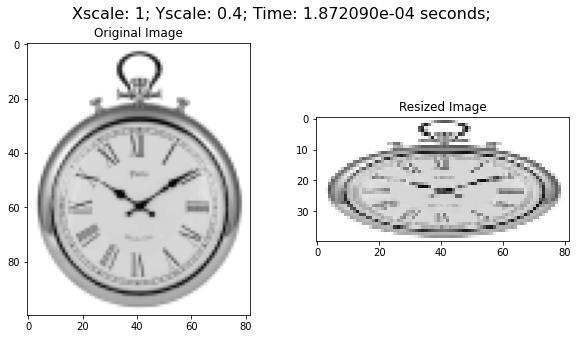

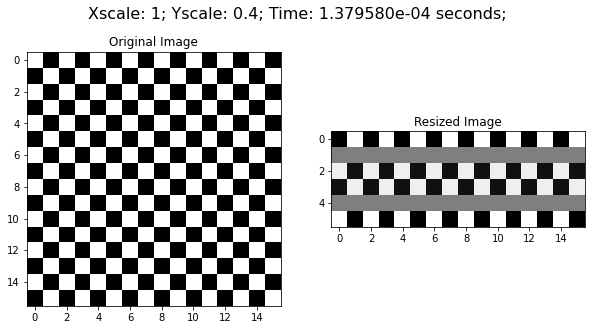

In [44]:
resize_img(I, 1, 0.4, cv2.INTER_LANCZOS4)
resize_img(clock, 1, 0.4, cv2.INTER_LANCZOS4)
resize_img(chessboard, 1, 0.4, cv2.INTER_LANCZOS4)

## Rozdzielczość (dpi)

Omówioną wcześniej rozdzielczość przestrzenną (rozmiar) należy utożsamiać z rozmiarem macierzy w której zapisany jest obraz.
W tym ujęciu rozmiar pojedynczego piksela nie ma specjalnego znaczenia.
Problem pojawia się, kiedy obraz trzeba wyświetlić lub wydrukować.
Wtedy pojedynczy piksel staje się ,,obiektem fizycznym'' i musi mieć swój rozmiar (wysokość/szerokość/powierzchnię).

Parametr dpi (ang. *dots per inch*) określa liczbę kropek (pikseli), która mieści się na jednym calu (25,4 mm) długości/szerokości.
Dopiero kombinacja rozmiaru i rozdzielczości określa nam rzeczywisty rozmiar obrazu jaki uzyskamy na wydruku.

Dpi staje się istotne w przypadku drukowania, gdyż wyświetlanie na monitorze odbywa się zazwyczaj 1 piksel obrazka = 1 piksel na monitorze (w przypadku maksymalnej rozdzielczości wspieranej przez monitor), ew. następuje automatyczne skalowanie.

Wpływ rozdzielczości można zademonstrować w następujący sposób:
- wczytaj obraz *lena.bmp*.  Ma on rozmiar $512 \times 512$.
- wykorzystując funkcję `imresize` stwórz obrazy o rozmiarach $256 \times 256$, $128 \times 128$, $64 \times 64$ - metoda interpolacji jest w tym wypadku mniej istotna.
- wyświetl obrazy wymuszając zachowanie na ekranie wejściowej rozdzielczości $512 \times 512$. W przypadku biblioteki *matplotlib* ta funkcjonalność jest domyślna.

Proszę zaobserwować co dzieję się z obrazkiem.

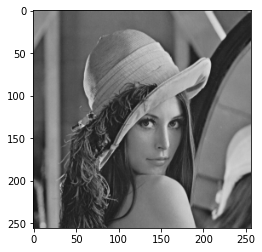

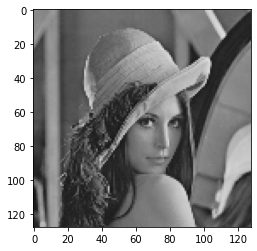

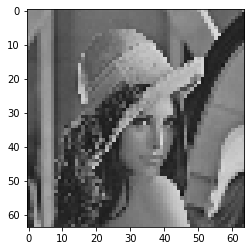

In [49]:
#TODO Porównanie

lena = cv2.imread("lena.bmp")

resized = cv2.resize(lena, (256, 256), cv2.INTER_NEAREST)
plt.imshow(resized)
plt.show()

resized = cv2.resize(lena, (128, 128), cv2.INTER_NEAREST)
plt.imshow(resized)
plt.show()

resized = cv2.resize(lena, (64, 64), cv2.INTER_NEAREST)
plt.imshow(resized)
plt.show()

## Liczba poziomów jasności

Dla obrazów w skali szarości pojedynczy piksel zwykle zapisuje się na 8 bitach, co daje 256 rozróżnialnych poziomów szarości.
Dla większości zastosowań wartość ta jest wystarczająca (choć są kamery o wyjścu 12 lub 16 bitów).
Jednak oko ludzkie nie potrafi rozróżnić wszystkich 256 poziomów jasności (jest za mało czułe).
Zazwyczaj człowiek rozróżnia 20-30 poziomów szarości (to ile i jakie dokładnie rozróżnia, zależy od konkretnego oświetlenia sceny i cech osobniczych).

W poniższych krokach zademonstrujemy omówione zjawisko:
- wczytaj (użyj) obrazu _lena_,
- wykorzystując znaną funkcję `normalize` zmień liczbę poziomów szarości z 0-255 na:
    * 0-31
    * 0-15
    * 0-7
    * 0-3
    * 0-1 (binaryzacja)
- rezultaty wyświetl na wspólnym rysunku.

Podpowiedzi:
- trzeba przygotować tablice na obrazki np, `I_31 = np.zeros(I.shape,'uint8')`,
- prawidłowe użycie funkcji normalize `cv2.normalize(I,I_31,0,31,cv2.NORM_MINMAX)`,
- przykładowe wyświetlanie `axsHist[0,1].imshow(I, 'gray', vmin=0, vmax=31)`.

Czy rezultaty eksperymentu pasują do teorii o rozpoznawaniu przez człowieka ograniczonego zakresu poziomów jasności?
Wizualne porównanie których obrazów o tym świadczy ?

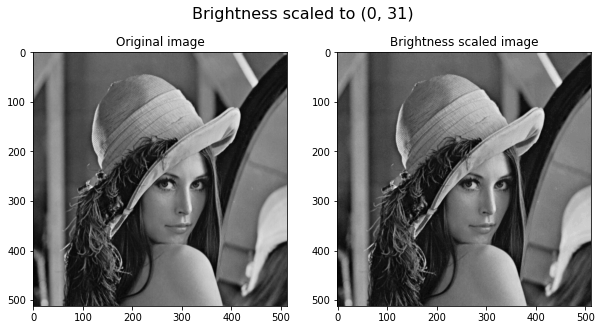

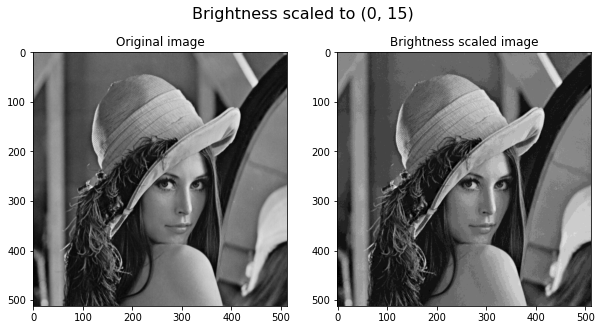

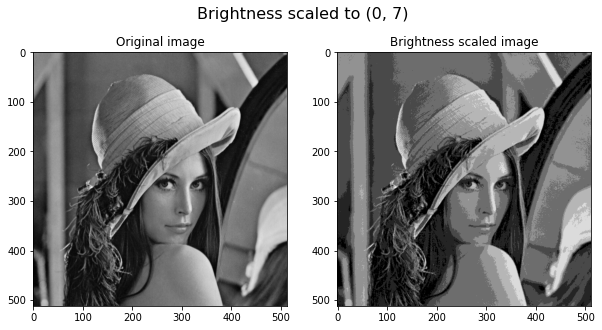

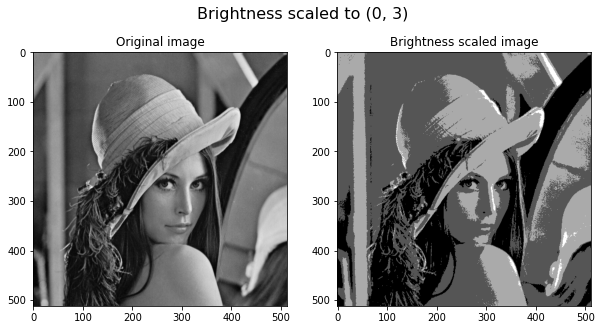

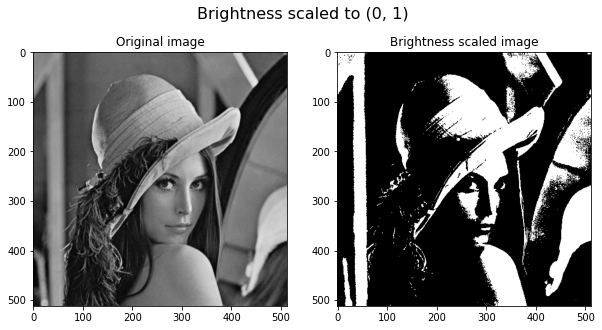

In [53]:
I = cv2.imread('lena.bmp')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

def changeImgBrightnessScale(I, start, end):
    I_changed = np.zeros(I.shape, 'uint8')
    cv2.normalize(I, I_changed, start, end, cv2.NORM_MINMAX)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Brightness scaled to ({start}, {end})", fontsize=16)

    ax1.imshow(I, 'gray')
    ax1.set_title("Original image")

    ax2.imshow(I_changed, 'gray', vmin=start, vmax=end)
    ax2.set_title("Brightness scaled image")

    plt.show()

changeImgBrightnessScale(I, 0, 31)
changeImgBrightnessScale(I, 0, 15)
changeImgBrightnessScale(I, 0, 7)
changeImgBrightnessScale(I, 0, 3)
changeImgBrightnessScale(I, 0, 1)